In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    Evaluation metrics for trained model
    
RETURN
------
    {EVALUATION-METRIC}.csv : csv file
        Evaluation metrics scores


EXPORTED FILE(s) LOCATION
-------------------------
    ./models/{NN or CV}/{EXPERIMENT}/{EVALUATION-METRIC}.csv
'''

import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
from scripts import config as src
import numpy as np
import pandas as pd
import datetime as dt
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
experiment = 'exper_mouse'
loc_output = os.path.join(src.DIR_REPORTS, 'clustering', experiment)

loc_output

'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse'

In [4]:
# df_metric_overall = pd.DataFrame()
df_metrics_all = pd.DataFrame()
for i_design in ['1_layer', '2_layer']:
    for i in sorted(glob.glob(os.path.join(loc_output,f'detail_{i_design}*.csv'))):
#         print(i)
        clustering_metrics = src.calculate_clustering_metrics(pd.read_csv(i))
        clustering_metrics['design'] = i.split('/')[-1].split('mouse')[0].split('detail')[-1][1:-1]
        df_metrics_all = pd.concat([df_metrics_all, clustering_metrics ], axis = 0)

calculate_clustering_metrics
560
calculate_clustering_metrics
560
calculate_clustering_metrics
560
calculate_clustering_metrics
560
calculate_clustering_metrics
560
calculate_clustering_metrics
560


In [5]:
df_metrics_co = df_metrics_all[df_metrics_all['cell_out']=='cell_out_4']
# df_metrics_co_d = df_metrics_co[df_metrics_co['design']=='1_layer_ppi100']
df_metrics_co.groupby(['design','metric']).mean().reset_index().pivot(index='design', columns='metric', values='score')

metric,ami,ari,completeness,fowlkes_mallows,homogeneity,mean,v_measure
design,,,,,,,
1_layer_pathway_fgs_dense,0.786106,0.724611,0.798757,0.814220,0.800927,0.787033,0.797579
1_layer_pathway_fgs_ppi_with_100_dense,0.805401,0.741523,0.811492,0.824169,0.822491,0.803308,0.814773
1_layer_pathway_fgs_ppitf_with_100_dense,0.802336,0.745852,0.807931,0.826836,0.819632,0.802416,0.811907
1_layer_pathway_fgs_signaling,0.793377,0.729370,0.799334,0.814575,0.811882,0.792021,0.803588
1_layer_pathway_fgs_signaling_with_100_dense,0.807338,0.740609,0.807336,0.823352,0.828940,0.803885,0.815737
2_layer_pathway_fgs_signaling,0.779625,0.725772,0.787440,0.812216,0.796547,0.781950,0.790100


In [7]:
df_metrics_co = df_metrics_all[df_metrics_all['cell_out']=='cell_out_4']
# df_metrics_co_d = df_metrics_co[df_metrics_co['design']=='1_layer_ppi100']
df_metrics_co.groupby(['design','metric']).mean().reset_index().pivot(index='design', columns='metric', values='score')

metric,ami,ari,completeness,fowlkes_mallows,homogeneity,mean,v_measure
design,,,,,,,
1_layer_dense100,0.786106,0.724611,0.798757,0.814220,0.800927,0.787033,0.797579
1_layer_ppi100,0.793579,0.728225,0.803995,0.817050,0.810969,0.793101,0.804788
1_layer_ppitf100,0.802336,0.745852,0.807931,0.826836,0.819632,0.802416,0.811907
1_layer_signaling,0.778040,0.716423,0.788468,0.809049,0.796514,0.779699,0.789702
1_layer_signaling+100dense,0.786277,0.717876,0.797388,0.810787,0.804086,0.785701,0.797791
2_layer_signaling,0.773988,0.728670,0.802780,0.819818,0.775448,0.781081,0.785780


In [8]:
df_metrics_all

,score,index_split,metric,cell_out,design
0,0.883274,0,homogeneity,cell_out_2,1_layer_dense100
1,1.000000,1,homogeneity,cell_out_2,1_layer_dense100
2,1.000000,2,homogeneity,cell_out_2,1_layer_dense100
3,1.000000,3,homogeneity,cell_out_2,1_layer_dense100
4,1.000000,4,homogeneity,cell_out_2,1_layer_dense100
...,...,...,...,...,...
555,0.653121,15,mean,cell_out_8,2_layer_signaling
556,0.558937,16,mean,cell_out_8,2_layer_signaling
557,0.660516,17,mean,cell_out_8,2_layer_signaling
558,0.769534,18,mean,cell_out_8,2_layer_signaling


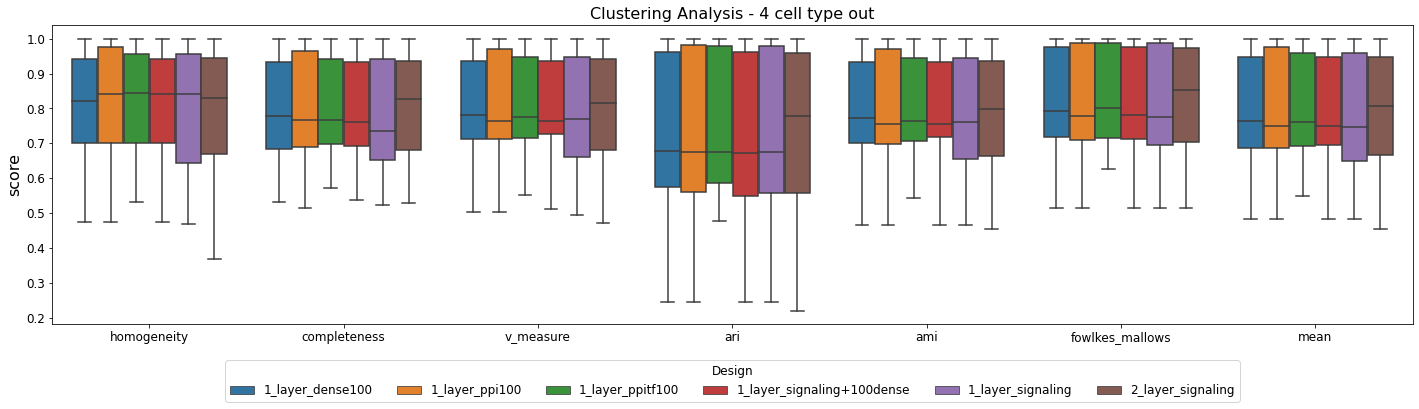

In [12]:
df_metrics_co = df_metrics_all[df_metrics_all['cell_out']=='cell_out_4']
sns.set_palette("tab10")
plt.figure(figsize=(20,6))
sns.boxplot(data=df_metrics_co, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
# legend = plt.legend(title='Proposed network', loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=False, shadow=False, ncol=2)
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(.5, -0.1), ncol= 6 )
legend.get_title().set_fontsize(SMALL_SIZE) #legend 'Title' fontsize
plt.xticks(rotation=0)
plt.title('Clustering Analysis - 4 cell type out')
plt.tight_layout();
plt.savefig(os.path.join(loc_output,('1_metrics.png')), dpi=300, bbox_inches = 'tight')
plt.savefig(os.path.join(loc_output,('1_metrics.pdf')), dpi=300, bbox_inches = 'tight')
plt.savefig(os.path.join(loc_output,('1_metrics.svg')), dpi=300, bbox_inches = 'tight')

In [30]:
df_metric_overall = pd.DataFrame()
for i in glob.glob(os.path.join(loc_output,'metrics*')):
    print(i)
    df_metric_overall = pd.concat([df_metric_overall, pd.read_csv(i)])

df_metric_overall['mean'] = df_metric_overall.iloc[:, 2:].mean(axis=1)
df_metric_overall=df_metric_overall[['design','cell_out','homogeneity','completeness','v_measure','ari','ami','fowlkes_mallows','mean']]
df_metric_overall = df_metric_overall.sort_values(by=['cell_out','design'])
df_metric_overall.to_csv(os.path.join(loc_output, 'evaluate_all.csv'))
df_metric_overall

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_1_layer_ppitf100.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_1_layer_signaling.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_1_layer_dense100.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_1_layer_signaling+100dense.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_2_layer_signaling.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/clustering/exper_mouse/metrics_1_layer_ppi100.csv


,design,cell_out,homogeneity,completeness,v_measure,ari,ami,fowlkes_mallows,mean
0,1_layer_dense100,cell_out_2,0.908514,0.895124,0.900194,0.905627,0.897350,0.960918,0.911288
0,1_layer_ppi100,cell_out_2,0.925099,0.912381,0.917118,0.921579,0.914843,0.969123,0.926690
0,1_layer_ppitf100,cell_out_2,0.925099,0.912381,0.917118,0.921579,0.914843,0.969123,0.926690
0,1_layer_signaling,cell_out_2,0.945210,0.935717,0.940246,0.952723,0.938624,0.978927,0.948574
0,1_layer_signaling+100dense,cell_out_2,0.959278,0.954504,0.956839,0.965170,0.955473,0.983257,0.962420
0,2_layer_signaling,cell_out_2,0.946038,0.939186,0.942528,0.952641,0.940739,0.977556,0.949782
1,1_layer_dense100,cell_out_4,0.800927,0.798757,0.797579,0.724611,0.786106,0.814220,0.787033
1,1_layer_ppi100,cell_out_4,0.810969,0.803995,0.804788,0.728225,0.793579,0.817050,0.793101
1,1_layer_ppitf100,cell_out_4,0.819632,0.807931,0.811907,0.745852,0.802336,0.826836,0.802416
1,1_layer_signaling,cell_out_4,0.796514,0.788468,0.789702,0.716423,0.778040,0.809049,0.779699
